In [2]:
# User Constraints
# 1. maximum pct in each stock
single_stock_limit = 20

# 2. minimum and maximum pct in shariah stock
shariah_min_pct, shariah_max_pct = 0, 100

# 3. minimum and maximum PE ratio in stock
PE_min, PE_max = 0.0, 120.0

# 4. minimum and maximum Market Cap in stock
MC_min, MC_max = 12000000000, 87000000000

# 5. minimum and maximum pct in Financials stock
Financials_min_pct, Financials_max_pct = 0, 100

# 6. minimum and maximum pct in Materials stock
Materials_min_pct, Materials_max_pct = 0, 100

# 7. minimum and maximum pct in Utilities stock
Utilities_min_pct, Utilities_max_pct = 0, 100

# 8. minimum and maximum pct in Health Care stock
Health_Care_min_pct, Health_Care_max_pct = 0, 100

# 9. minimum and maximum pct in Communication Services stock
Communication_Services_min_pct, Communication_Services_max_pct = 0,100

# 10. minimum and maximum pct in Consumer Staples stock
Consumer_Staples_min_pct, Consumer_Staples_max_pct = 0, 100

# 11. minimum and maximum pct in Industrials stock
Industrials_min_pct, Industrials_max_pct = 0, 100

# 12. minimum and maximum pct in Consumer Discretionary stock
Consumer_Discretionary_min_pct, Consumer_Discretionary_max_pct = 0, 100

# 13. minimum and maximum pct in Energy stock
Energy_min_pct, Energy_max_pct = 0, 100

# 14. minimum and maximum pct in Real Estate stock
Real_Estate_min_pct, Real_Estate_max_pct = 0, 100

In [3]:
# Functions
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

def portfolio_annualised_return(weights, mean_returns):
    returns = np.sum(mean_returns*weights) *252
    return returns

def portfolio_annualised_risk(weights, cov_matrix):
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std

# To mininise negative objective function 
def neg_sharpe_or_sortino_ratio(weights, mean_returns, cov_matrix, risk_free_rate): # to rename sharpe/sortino
    p_ret = portfolio_annualised_return(weights, mean_returns)
    p_var = portfolio_annualised_risk(weights, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def get_opt_allocation(mean_returns, cov_matrix, risk_free_rate, 
                     single_stock_lim, 
                     shariah_idx, shariah_min, shariah_max, 
                     PE_idx, 
                     MC_idx,
                     Financials_idx, Financials_min, Financials_max,
                      Materials_idx, Materials_min, Materials_max,
                      Utilities_idx, Utilities_min, Utilities_max,
                      Health_Care_idx, Health_Care_min, Health_Care_max,
                      Communication_Services_idx, Communication_Services_min, Communication_Services_max,
                      Consumer_Staples_idx, Consumer_Staples_min, Consumer_Staples_max,
                      Industrials_idx, Industrials_min, Industrials_max,
                      Consumer_Discretionary_idx, Consumer_Discretionary_min, Consumer_Discretionary_max,
                      Energy_idx, Energy_min, Energy_max,
                      Real_Estate_idx, Real_Estate_min, Real_Estate_max): 
    
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = (
                    # total weight = 100            
                    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
                    # total shariah weight >= shariah min
                    {'type': 'ineq', 'fun': lambda x: np.sum(x[shariah_idx]) - shariah_min/100}, 
                    # total shariah weight <= shariah max
                    {'type': 'ineq', 'fun': lambda x: np.sum(-x[shariah_idx]) + shariah_max/100}, 
                    # total PE weight = 100
                    {'type': 'eq', 'fun': lambda x: np.sum(x[PE_idx]) - 1}, 
                    # total MC weight = 100
                    {'type': 'eq', 'fun': lambda x: np.sum(x[MC_idx]) - 1},
                    # total Financials weight >= Financials min
                    {'type': 'ineq', 'fun': lambda x: np.sum(x[Financials_idx]) - Financials_min/100}, 
                    # total Financials weight <= Financials max
                    {'type': 'ineq', 'fun': lambda x: np.sum(-x[Financials_idx]) + Financials_max/100}, 
                    # total Materials weight >= Materials min
                    {'type': 'ineq', 'fun': lambda x: np.sum(x[Materials_idx]) - Materials_min/100}, 
                     # total Materials weight <= Materials max
                    {'type': 'ineq', 'fun': lambda x: np.sum(-x[Materials_idx]) + Materials_max/100},
                    # total Utilities weight >= Utilities min
                    {'type': 'ineq', 'fun': lambda x: np.sum(x[Utilities_idx]) - Utilities_min/100}, 
                    # total Utilities weight <= Utilities max
                    {'type': 'ineq', 'fun': lambda x: np.sum(-x[Utilities_idx]) + Utilities_max/100}, 
                    # total Health_Care weight >= Health_Care min
                    {'type': 'ineq', 'fun': lambda x: np.sum(x[Health_Care_idx]) - Health_Care_min/100}, 
                    # total Health_Care weight <= Health_Care max
                    {'type': 'ineq', 'fun': lambda x: np.sum(-x[Health_Care_idx]) + Health_Care_max/100}, 
                    # total Communication_Services weight >= Communication_Services min
                    {'type': 'ineq', 'fun': lambda x: np.sum(x[Communication_Services_idx]) - Communication_Services_min/100}, 
                    # total Communication_Services weight <= Communication_Services max
                    {'type': 'ineq', 'fun': lambda x: np.sum(-x[Communication_Services_idx]) + Communication_Services_max/100}, 
                     # total Consumer_Staples weight >= Consumer_Staples min
                    {'type': 'ineq', 'fun': lambda x: np.sum(x[Consumer_Staples_idx]) - Consumer_Staples_min/100},
                    # total Consumer_Staples weight <= Consumer_Staples max
                    {'type': 'ineq', 'fun': lambda x: np.sum(-x[Consumer_Staples_idx]) + Consumer_Staples_max/100}, 
                    # total Industrials weight >= Industrials min
                    {'type': 'ineq', 'fun': lambda x: np.sum(x[Industrials_idx]) - Industrials_min/100}, 
                    # total Industrials weight <= Industrials max
                    {'type': 'ineq', 'fun': lambda x: np.sum(-x[Industrials_idx]) + Industrials_max/100}, 
                    # total Consumer_Discretionary weight >= Consumer_Discretionary min
                    {'type': 'ineq', 'fun': lambda x: np.sum(x[Consumer_Discretionary_idx]) - Consumer_Discretionary_min/100}, 
                    # total Consumer_Discretionary weight <= Consumer_Discretionary max
                    {'type': 'ineq', 'fun': lambda x: np.sum(-x[Consumer_Discretionary_idx]) + Consumer_Discretionary_max/100}, 
                    # total Energy weight >= Energy min
                    {'type': 'ineq', 'fun': lambda x: np.sum(x[Energy_idx]) - Energy_min/100}, 
                    # total Energy weight <= Energy max
                    {'type': 'ineq', 'fun': lambda x: np.sum(-x[Energy_idx]) + Energy_max/100}, 
                    # total Real_Estate weight >= Real_Estate min
                    {'type': 'ineq', 'fun': lambda x: np.sum(x[Real_Estate_idx]) - Real_Estate_min/100}, 
                    # total Real_Estate weight <= Real_Estate max
                    {'type': 'ineq', 'fun': lambda x: np.sum(-x[Real_Estate_idx]) + Real_Estate_max/100}) 
    # weight is between 0 to single_stock_lim
    bound = (0.0,single_stock_lim/100.0) 
    bounds = tuple(bound for asset in range(num_assets))
    # optimise objective function
    result = opt.minimize(neg_sharpe_or_sortino_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    
    # return allocation
    opt_allocation = pd.DataFrame(result.x,index=PX_LAST.columns,columns=['allocation'])  
    opt_allocation.allocation = [round(i*100,2)for i in opt_allocation.allocation]
    opt_allocation = opt_allocation.T
    return opt_allocation

In [4]:
# Load source: stock profiles
stock_profile = pd.read_csv("https://gitlab.com/wqd/portfolio_optimiser/raw/master/bursa_all_stocks.csv")
stock_profile['Market Cap'] = stock_profile['Market Cap'].str.replace(",","").astype(float)
# To shorten Stock_Name
stock_profile['Ticker'] = stock_profile['Ticker'].str.replace(" MK Equity","")
# Top 30 only
stock_profile = stock_profile[0:30]
stock_profile.head()
stock_profile.tail()
stock_profile.columns

# Get index positions
# Shariah constraints
shariah_index = stock_profile[stock_profile['Islamic'] == "Y"]["Ticker"].index
# P/E constraints
PE_index = stock_profile[stock_profile['P/E'] >= PE_min]
PE_index = PE_index[PE_index['P/E'] <= PE_max]["Ticker"].index
# Market Cap constraints
MC_index = stock_profile[stock_profile['Market Cap'] >= MC_min]
MC_index = MC_index[MC_index['Market Cap'] <= MC_max]["Ticker"].index
# Industry constraints
Financials_index = stock_profile[stock_profile['Industry'] == "Financials"]["Ticker"].index
Materials_index = stock_profile[stock_profile['Industry'] == "Materials"]["Ticker"].index
Utilities_index = stock_profile[stock_profile['Industry'] == "Utilities"]["Ticker"].index
Health_Care_index = stock_profile[stock_profile['Industry'] == "Health Care"]["Ticker"].index
Communication_Services_index = stock_profile[stock_profile['Industry'] == "Communication Services"]["Ticker"].index
Consumer_Staples_index = stock_profile[stock_profile['Industry'] == "Consumer Staples"]["Ticker"].index
Industrials_index = stock_profile[stock_profile['Industry'] == "Industrials"]["Ticker"].index
Consumer_Discretionary_index = stock_profile[stock_profile['Industry'] == "Consumer Discretionary"]["Ticker"].index
Energy_index = stock_profile[stock_profile['Industry'] == "Energy"]["Ticker"].index 
Real_Estate_index = stock_profile[stock_profile['Industry'] == "Real Estate"]["Ticker"].index

In [5]:
# Summaries
stock_profile[['Ticker', 'Islamic']][stock_profile['Islamic'] == "Y"].sort_values('Ticker')

Ticker Islamic
7   AXIATA       Y
9     DIGI       Y
22     DLG       Y
25    HART       Y
5      IHH       Y
16     IOI       Y
27  KLCCSS       Y
15     KLK       Y
6    MAXIS       Y
13    MISC       Y
10    NESZ       Y
2    PCHEM       Y
14     PEP       Y
18    PETD       Y
24    PMAH       Y
11     PTG       Y
12    SDPL       Y
26    SIME       Y
3      TNB       Y
29    TOPG       Y

In [6]:
stock_profile[['Ticker', 'Industry']].sort_values('Industry')

Ticker                Industry
6     MAXIS  Communication Services
7    AXIATA  Communication Services
9      DIGI  Communication Services
23     GENM  Consumer Discretionary
17     GENT  Consumer Discretionary
14      PEP        Consumer Staples
10     NESZ        Consumer Staples
16      IOI        Consumer Staples
12     SDPL        Consumer Staples
15      KLK        Consumer Staples
22      DLG                  Energy
18     PETD                  Energy
21     HLFG              Financials
20  RHBBANK              Financials
0       MAY              Financials
8      HLBK              Financials
4      CIMB              Financials
1       PBK              Financials
28      AMM              Financials
5       IHH             Health Care
25     HART             Health Care
29     TOPG             Health Care
13     MISC             Industrials
19      HAP             Industrials
26     SIME             Industrials
2     PCHEM               Materials
24     PMAH               Materials
27   KLCCSS             Real Estate
11      PTG               Utilities
3       TNB               Utilities

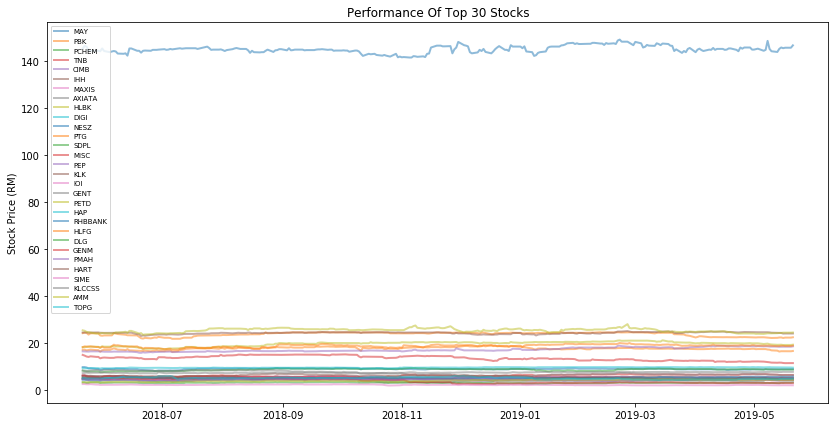

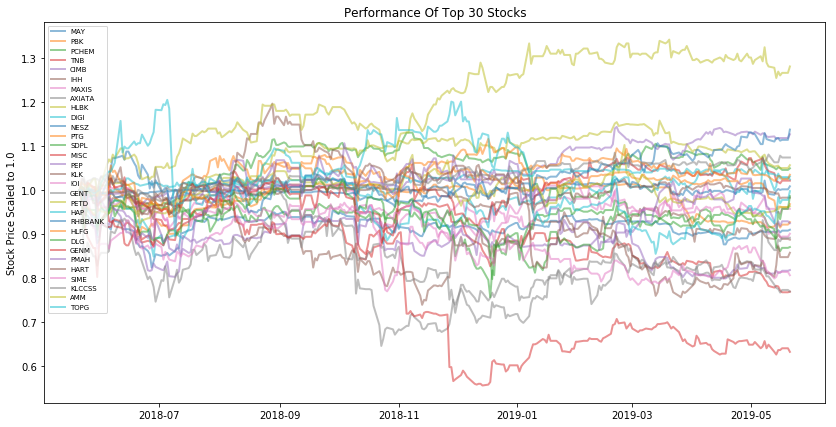

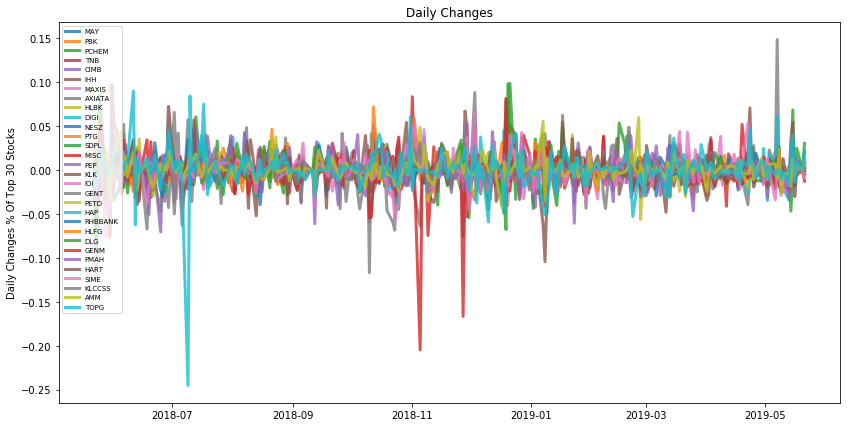

In [7]:
# Load source: stock prices
PX_LAST = pd.read_csv("https://gitlab.com/wqd/portfolio_optimiser/raw/master/stock_prices.csv")
PX_LAST.head()
PX_LAST.tail()
PX_LAST.columns
# To shorten Stock_Name
PX_LAST.columns = PX_LAST.columns.str.replace(" MK Equity","")
PX_LAST.columns
# To format Dates
PX_LAST["Dates"] = pd.to_datetime(PX_LAST["Dates"], format='%d/%m/%Y')
# Get data from the latest 1 year
PX_LAST = PX_LAST[PX_LAST["Dates"] >= "2018-05-21"]
PX_LAST.head()
PX_LAST.tail()
# Set Dates as index
PX_LAST = PX_LAST.set_index('Dates')

# Visualise Share Prices
plt.figure(figsize=(14, 7))
for i in PX_LAST.columns.values:
    plt.plot(PX_LAST.index, PX_LAST[i], lw = 2, alpha = 0.5, label = i)
plt.legend(loc='upper left', fontsize=7)
plt.ylabel('Stock Price (RM)')
plt.title('Performance Of Top 30 Stocks')

# Scale Prices to 1
PX_LAST = PX_LAST / PX_LAST.values[0]

# Re-visualise Share Prices
plt.figure(figsize=(14, 7))
for i in PX_LAST.columns.values:
    plt.plot(PX_LAST.index, PX_LAST[i], lw = 2, alpha = 0.5, label = i)
plt.legend(loc = 'upper left', fontsize = 7)
plt.ylabel('Stock Price Scaled to 1.0')
plt.title('Performance Of Top 30 Stocks')

# Visualise Daily Changes - Line
plt.figure(figsize=(14, 7))
for i in PX_LAST.columns.values:
    plt.plot(PX_LAST.index, PX_LAST[i].pct_change(), lw = 3, alpha = 0.8,label = i)
plt.legend(loc = 'upper left', fontsize = 7)
plt.ylabel('Daily Changes % Of Top 30 Stocks')
plt.title('Daily Changes')

# Values
returns = PX_LAST.pct_change()
mean_returns = returns.mean()
risk_free_rate = 0.0299/365 # from http://www.bnm.gov.my/index.php?ch=mmv&pg=stats_moneymarket&type=1
# Sharpe Ratio Denominator
cov_matrix_sharpe = returns.cov()
# Sortino Ratio Denominator
returns_sortino = PX_LAST.pct_change() - risk_free_rate
returns_sortino = returns_sortino.clip_upper(0) # ignoring all the positive variances and taking them as zero
cov_matrix_sortino = returns_sortino.cov()

Performance to Date % [-4.4]


MAY   PBK  PCHEM   TNB  CIMB   IHH  MAXIS  AXIATA  HLBK  DIGI  \
allocation  3.33  3.33   3.33  3.33  3.33  3.33   3.33    3.33  3.33  3.33   

            ...   RHBBANK  HLFG   DLG  GENM  PMAH  HART  SIME  KLCCSS   AMM  \
allocation  ...      3.33  3.33  3.33  3.33  3.33  3.33  3.33    3.33  3.33   

            TOPG  
allocation  3.33  

[1 rows x 30 columns]

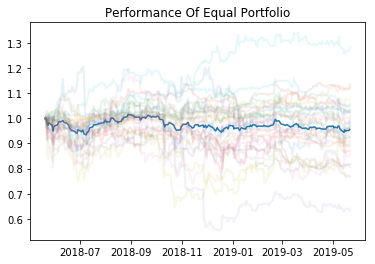

In [8]:
# Equal Weight Portfolio - equal weights to the 30 stocks
def equal_portfolios(size):
    weights = np.repeat(1, size)
    weights = weights / np.sum(weights)
    weights = pd.DataFrame(weights*100)
    weights.columns = ["allocation"]
    weights = weights.T  
    weights.columns = PX_LAST.columns
    return weights

# Portfolio
equal_portfolio = equal_portfolios(30)

# Portfolio Prices
equal_portfolio_prices = np.dot(PX_LAST , equal_portfolio.T/100)
# Performance To-Date
print ("Performance to Date %", ((equal_portfolio_prices[len(equal_portfolio_prices)-1] - 1) * 100).round(2))

# Visualise Portfolio Prices
plt.plot(PX_LAST.index, equal_portfolio_prices)
for i in PX_LAST.columns:
    plt.plot(PX_LAST.index, PX_LAST[i], alpha = .1, label = i, lw = 2)
plt.title('Performance Of Equal Portfolio')
    
# Allocation
stocks_allocated = equal_portfolio.T[equal_portfolio.T["allocation"] > 0]
stocks_allocated.T.round(2)

Performance to Date % [-2.54]


MAY   PBK  PCHEM   TNB  CIMB   IHH  MAXIS  AXIATA  HLBK  DIGI  \
allocation  3.7  1.65   0.88  1.41  1.75  1.62   3.23    0.72  2.31  1.18   

            ...   RHBBANK  HLFG   DLG  GENM  PMAH  HART  SIME  KLCCSS   AMM  \
allocation  ...      4.14  7.21  6.08  1.59  7.36  0.73  6.88    6.68  2.03   

            TOPG  
allocation  2.55  

[1 rows x 30 columns]

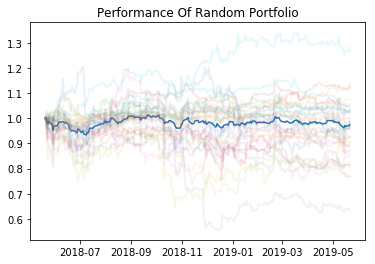

In [9]:
# Random Portfolio - random weights to all 30 stocks
def random_portfolios(size):
    weights = np.random.random(size)
    weights /= np.sum(weights)
    weights = pd.DataFrame(weights*100)
    weights.columns = ["allocation"]
    weights = weights.T  
    weights.columns = PX_LAST.columns
    return weights

# Portfolio
random_portfolio = random_portfolios(30)

# Portfolio Prices
random_portfolio_prices = np.dot(PX_LAST , random_portfolio.T/100)
# Performance To-Date
print ("Performance to Date %", ((random_portfolio_prices[len(random_portfolio_prices)-1] - 1) * 100).round(2))

# Visualise Portfolio Prices
plt.plot(PX_LAST.index, random_portfolio_prices)
for i in PX_LAST.columns:
    plt.plot(PX_LAST.index, PX_LAST[i], alpha = .1, label = i, lw = 2)
plt.title('Performance Of Random Portfolio')

# Allocation
stocks_allocated = random_portfolio.T[random_portfolio.T["allocation"] > 0]
stocks_allocated.T.round(2)

Performance to Date % [13.22]


PCHEM  HLBK  DIGI  MISC   PEP  RHBBANK  KLCCSS   AMM
allocation   5.19  4.38  5.38  5.05  20.0     20.0    20.0  20.0

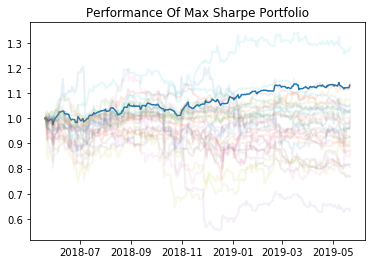

In [10]:
# Max Sharpe Portfolio
max_sharpe_portfolio = get_opt_allocation(mean_returns, cov_matrix_sharpe, risk_free_rate,  
                                          single_stock_limit, 
                                          shariah_index, shariah_min_pct, shariah_max_pct, 
                                          PE_index, 
                                          MC_index,
                                          Financials_index, Financials_min_pct, Financials_max_pct,
                                          Materials_index, Materials_min_pct, Materials_max_pct,
                                          Utilities_index, Utilities_min_pct, Utilities_max_pct,
                                          Health_Care_index, Health_Care_min_pct, Health_Care_max_pct,
                                          Communication_Services_index, Communication_Services_min_pct, Communication_Services_max_pct,
                                          Consumer_Staples_index, Consumer_Staples_min_pct, Consumer_Staples_max_pct,
                                          Industrials_index, Industrials_min_pct, Industrials_max_pct,
                                          Consumer_Discretionary_index, Consumer_Discretionary_min_pct, Consumer_Discretionary_max_pct,
                                          Energy_index, Energy_min_pct, Energy_max_pct,
                                          Real_Estate_index, Real_Estate_min_pct, Real_Estate_max_pct)  



# Portfolio Prices
max_sharpe_portfolio_prices = np.dot(PX_LAST , max_sharpe_portfolio.T/100)
# Performance To-Date
print ("Performance to Date %", ((max_sharpe_portfolio_prices[len(max_sharpe_portfolio_prices)-1] - 1) * 100).round(2))

# Visualise Portfolio Prices Among All Stocks
plt.plot(PX_LAST.index, max_sharpe_portfolio_prices)
for i in PX_LAST.columns:
    plt.plot(PX_LAST.index, PX_LAST[i], alpha = .1, label = i, lw = 2)
plt.title('Performance Of Max Sharpe Portfolio')
    
# Allocation
stocks_allocated = max_sharpe_portfolio.T[max_sharpe_portfolio.T["allocation"] > 0]
stocks_allocated.T

In [11]:
# Max Sortino Portfolio
max_sortino_portfolio = get_opt_allocation(mean_returns, cov_matrix_sortino, risk_free_rate,  
                                          single_stock_limit, 
                                          shariah_index, shariah_min_pct, shariah_max_pct, 
                                          PE_index, 
                                          MC_index,
                                          Financials_index, Financials_min_pct, Financials_max_pct,
                                          Materials_index, Materials_min_pct, Materials_max_pct,
                                          Utilities_index, Utilities_min_pct, Utilities_max_pct,
                                          Health_Care_index, Health_Care_min_pct, Health_Care_max_pct,
                                          Communication_Services_index, Communication_Services_min_pct, Communication_Services_max_pct,
                                          Consumer_Staples_index, Consumer_Staples_min_pct, Consumer_Staples_max_pct,
                                          Industrials_index, Industrials_min_pct, Industrials_max_pct,
                                          Consumer_Discretionary_index, Consumer_Discretionary_min_pct, Consumer_Discretionary_max_pct,
                                          Energy_index, Energy_min_pct, Energy_max_pct,
                                          Real_Estate_index, Real_Estate_min_pct, Real_Estate_max_pct)   

# Portfolio Prices
max_sortino_portfolio_prices = np.dot(PX_LAST , max_sortino_portfolio.T/100)
# Performance To-Date
print ("Performance to Date %", ((max_sortino_portfolio_prices[len(max_sortino_portfolio_prices)-1] - 1) * 100).round(2))
   
# Visualise Portfolio Prices Among All Stocks
plt.plot(PX_LAST.index, max_sharpe_portfolio_prices)
for i in PX_LAST.columns:
    plt.plot(PX_LAST.index, PX_LAST[i], alpha = .1, label = i, lw = 2)
plt.title('Performance Of Max Sortino Portfolio')
    
# Allocation
stocks_allocated = max_sortino_portfolio.T[max_sortino_portfolio.T["allocation"] > 0]
stocks_allocated.T

Performance to Date % [13.01]


PCHEM  HLBK   PEP   HAP  RHBBANK  KLCCSS   AMM
allocation  19.08  1.35  20.0  3.56    16.02    20.0  20.0